In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
boston = fetch_openml(name="boston", version=1)
x, y = boston.data, boston.target
x.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [3]:
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [4]:
x.loc[:,'RAD'] = x['RAD'].astype(str)

In [5]:
x.loc[:, 'CRIM'] = np.log(x['CRIM'])
x.loc[:, 'LSTAT'] = np.log(x['LSTAT'])
#x.loc[:, 'TAX'] = np.log(x['TAX'].max()-x['TAX'])
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')
x.loc[:,'TAX'] = scaler.fit_transform(x[['TAX']])
# Target Encoding Example (using mean target value per category)
#import category_encoders as ce
#encoder = ce.TargetEncoder()
#x.loc[:,'RAD'] = encoder.fit_transform(x['RAD'], y)
#freq_encoding = x['RAD'].value_counts().to_dict()
#x.loc[:,'RAD'] = x['RAD'].map(freq_encoding)


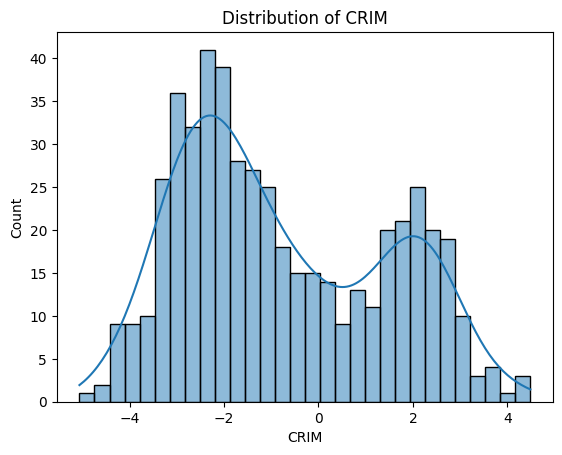

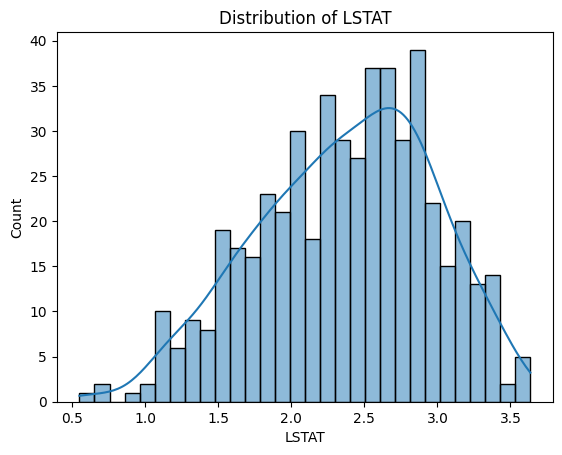

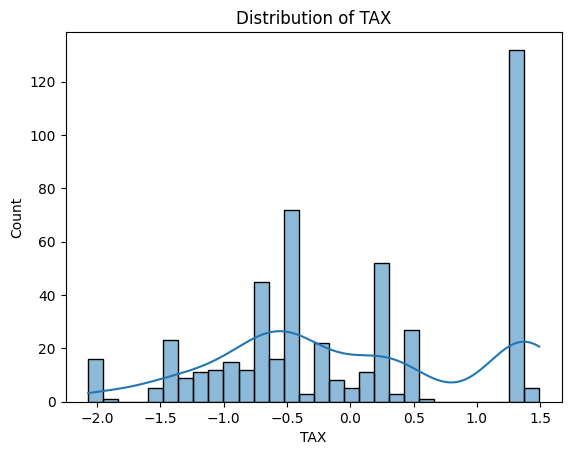

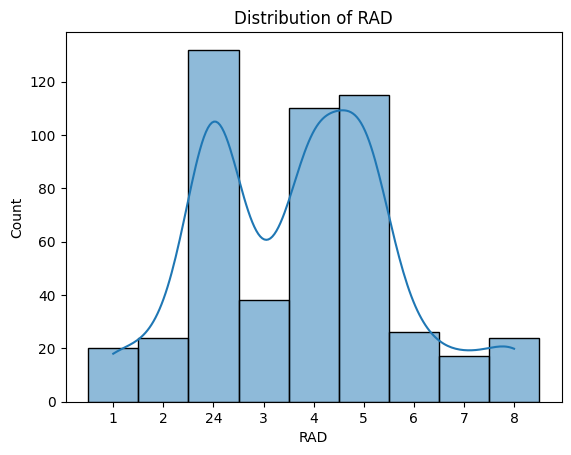

In [6]:
for i in ['CRIM', 'LSTAT', 'TAX','RAD']:
    sns.histplot(x[i], bins=30, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()


In [7]:
x['RMIC'] = x['RM']*x['LSTAT']
x = x.drop(columns=['B','ZN','CHAS','LSTAT'])

In [8]:
x.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,RMIC
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000
mean,-0.780436,11.136779,0.554695,6.284634,68.574901,3.795043,-1.510956e-14,18.455534,14.620642
std,2.162050,6.860353,0.115878,0.702617,28.148861,2.105710,1.000990e+00,2.164946,3.064817
min,-5.064036,0.460000,0.385000,3.561000,2.900000,1.129600,-2.071108e+00,12.600000,4.104881
25%,-2.500488,5.190000,0.449000,5.885500,45.025000,2.100175,-7.314158e-01,17.400000,12.560931
50%,-1.360641,9.690000,0.538000,6.208500,77.500000,3.207450,-2.479552e-01,19.050000,14.933203
75%,1.302119,18.100000,0.624000,6.623500,94.075000,5.188425,1.369575e+00,20.200000,16.674416
max,4.488369,27.740000,0.871000,8.780000,100.000000,12.126500,1.491987e+00,22.000000,22.041411


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
y = np.array(y)
x = np.array(x)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)
y_train_s = scaler.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_s = scaler.fit_transform(y_test.reshape(-1,1)).ravel()
lr = LinearRegression()
lr.fit(x_train_s,y_train_s)
y_pred = lr.predict(x_test_s)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).ravel()
#y_test = scaler.inverse_transform(y_test_s.reshape(-1,1)).ravel()
print("R2 score: ",r2_score(y_pred=y_pred,y_true=y_test))
print("100-MAPE: ",100-mean_absolute_percentage_error(y_pred,y_test))


R2 score:  0.7617252414575386
100-MAPE:  99.86194978711113


In [10]:
boston = fetch_openml(name="boston", version=1)
x, y = boston.data, boston.target
y = np.array(y)
x = np.array(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtg = DecisionTreeRegressor(random_state=2)
params = {
    'max_depth':[2,3,5,7,9,11,8]
}
dtg = GridSearchCV(dtg, param_grid=params,cv=5, n_jobs=-1)
dtg.fit(x_train,y_train)
y_pred = dtg.best_estimator_.predict(x_test)
print("Best params: ",dtg.best_params_)
print("R2-Score: ",r2_score(y_pred,y_test))
print("MAPE: ",100-mean_absolute_percentage_error(y_pred,y_test))

Best params:  {'max_depth': 7}
R2-Score:  0.8431008977553665
MAPE:  99.87515744619878


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor(random_state=2)
param_grid = {
    'n_estimators': [10,20,40,80,100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2,3,5,7],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5,n_jobs=-1)
grid_search.fit(x_train, y_train)
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(x_test)
mape = 100 - mean_absolute_percentage_error(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("R2 score: ",r2_score(y_pred,y_test))
print("100-MAPE:", mape)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
R2 score:  0.871136308477658
100-MAPE: 99.8991878609254


In [12]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(random_state=2)
param={
    "n_estimators":[100,150],
    "max_depth" : [2,3,5,7],
    "max_features" :['sqrt','log2'],
    "n_jobs": [-1],
}
gridRfg = GridSearchCV(estimator=rfg,cv=5,param_grid=param,n_jobs=-1)
gridRfg.fit(x_train,y_train)
y_pred = gridRfg.best_estimator_.predict(x_test)
print("Best Parameters:", gridRfg.best_params_)
print("R2 score: ",r2_score(y_pred,y_test))
print("100-MAPE:", mape)


Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1}
R2 score:  0.7555480455083408
100-MAPE: 99.8991878609254
